---
layout: page
title: Investing and Inflation
---

In [6]:
""" import library and package dependencies """
import sys
sys.path.insert(0, '../src')
import os
import datetime
import pytz
from collections import namedtuple
from urllib.parse import quote
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from IPython.display import display, Markdown

from data_loader import load_csv_data, get_last_publish_date
from chart_format import StandardChart, PercentileChart

## [Inflation](inflation.html)

The Consumer Price Index that the Reserve Bank of Australia use to index inflation is published quarterly, one month after the end of each quarter.

See [inflation](inflation.html) for inflation charts, trends and analysis.

In [2]:
""" Load dataframes from other notebooks """
df_inflation = pd.DataFrame()
df_spx = pd.DataFrame()
%store -r df_inflation
%store -r df_spx

In [3]:
""" Chart variables """
start_date = pd.to_datetime('1960-01-01')
end_date = pd.to_datetime('2025-01-01') # used to force chart to plot to end of 5 year period
df_spx = df_spx.loc[df_spx.index >= start_date]
df_inflation = df_inflation.loc[df_inflation.index >= start_date]
price_column = 'rolling_10_years_median'
inflation_column = 'GCPIAGYP'
# Set 'last_index' to the last date with a valid value (so I can display 'as of <date>' in chart title)
last_index = df_spx[price_column].last_valid_index()

In [4]:
def add_horizontal_band(plt, legend_location='best'):
    # Add a horizontal band between y=2 and y=3
    plt.fill_between(df_inflation.index, 2, 3, color=colors[1]['color'], alpha=0.1)
    # Create a Patch for the legend
    target_range = mpatches.Patch(color=colors[1]['color'], alpha=0.1, label='Target Inflation Range')
    # Get the existing legend entries
    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    # Add the patch to the existing handles
    handles.append(target_range)
    plt.legend(handles=handles, loc=legend_location)
    return plt

While inflation may have a direct impact on company profitability and subsequently market prices, there is not a strong correlation between inflation and investment returns.

The S&P 500 Index is reasonably volatility over a multi year time horizon regardless of inflation. 

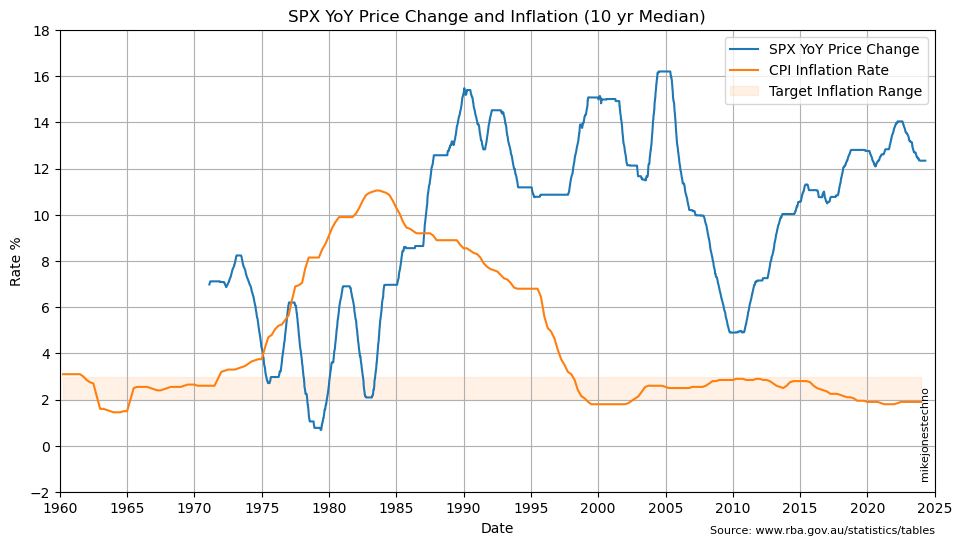

In [5]:
""" Prepare simple chart """

chart_params = {
    'chart_title': 'SPX YoY Price Change and Inflation (10 yr Median)', 
    'chart_source': 'Source: www.rba.gov.au/statistics/tables', 
    'y_label': 'Rate %', 
    'y_ticks': 2,
    'x_label': 'Date', 
    'x_ticks': 5,
    'start_year': 1960,
    'data_column': inflation_column
}

standard_chart = StandardChart(**chart_params)
plt, colors = standard_chart.base_chart(df_inflation)
plt.plot(df_spx.index, df_spx[price_column],color=colors[0]['color'], label='SPX YoY Price Change')
plt.plot(df_inflation.index, df_inflation[price_column], color=colors[1]['color'], label='CPI Inflation Rate')
legend = plt.legend(loc='best')
legend.get_frame().set_alpha(0.98)
plt = add_horizontal_band(plt)

plt.show()